In [4]:
#Importing necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
# Loading the dataset and storing it into the dataframe df.
df = pd.read_csv('C:/Users/bijoy/OneDrive/Documents/Praxis DS/Own project/Mumbai house price prediction/mumbai.csv/mumbai_main.csv')
pd.options.display.max_columns = 30

# Exploratory Data Analysis and Cleaning the Data.¶

In [6]:
# Checking Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             6255 non-null   float64
 1   Address           6255 non-null   object 
 2   area              6255 non-null   float64
 3   latitude          6255 non-null   float64
 4   longitude         6255 non-null   float64
 5   Bedrooms          6255 non-null   float64
 6   Bathrooms         6255 non-null   float64
 7   Balcony           2376 non-null   float64
 8   Status            5774 non-null   object 
 9   neworold          6255 non-null   object 
 10  parking           2129 non-null   float64
 11  Furnished_status  3600 non-null   object 
 12  Lift              1678 non-null   float64
 13  Landmarks         2617 non-null   object 
 14  type_of_building  6255 non-null   object 
 15  desc              6255 non-null   object 
 16  Price_sqft        6255 non-null   float64


In [7]:
# Checking the head of the dataframe.
df.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,19.032800,72.896357,2.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,19.032800,72.896357,3.0,2.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Right fr...,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,19.085600,72.909277,3.0,3.0,NaN,Under Construction,New Property,1.0,NaN,2.0,NaN,Flat,\n \n \n...,32747.933884
3,18700000.0,"Plot Number 283, Road Number 3, Jawahar Nagar,...",629.0,19.155756,72.846862,2.0,2.0,2.0,Ready to Move,New Property,1.0,NaN,3.0,Laxmi Callista,Flat,\n\n\n Welcome ...,29729.729730
4,13500000.0,"malad east, Malad East, Mumbai - North Mumbai,...",1090.0,19.177555,72.849887,2.0,2.0,NaN,NaN,New Property,1.0,Unfurnished,2.0,near uper govind nagar,Flat,\n \n \n...,12385.321101


In [8]:
df.Status.value_counts()

Ready to Move         5771
Under Construction       3
Name: Status, dtype: int64

In [9]:
df.Status.value_counts(normalize=True)

Ready to Move         0.99948
Under Construction    0.00052
Name: Status, dtype: float64

In [10]:
df.neworold.value_counts()

Resale          5515
New Property     740
Name: neworold, dtype: int64

In [11]:
df.type_of_building.value_counts()

Flat                5828
Individual House     427
Name: type_of_building, dtype: int64

In [12]:
#Initial Shape of the DataFrame.
df.shape

(6255, 17)

In [13]:
# Displaying the column names for the dataframe.
df.columns

Index(['price', 'Address', 'area', 'latitude', 'longitude', 'Bedrooms',
       'Bathrooms', 'Balcony', 'Status', 'neworold', 'parking',
       'Furnished_status', 'Lift', 'Landmarks', 'type_of_building', 'desc',
       'Price_sqft'],
      dtype='object')

In [14]:
# Quick data description.
df['price'].describe()

count    6.255000e+03
mean     2.684187e+07
std      2.788831e+07
min      1.500000e+06
25%      1.300000e+07
50%      1.900000e+07
75%      3.000000e+07
max      3.600000e+08
Name: price, dtype: float64

In [15]:
# Looking at number of null values.
df.isnull().sum()

price                  0
Address                0
area                   0
latitude               0
longitude              0
Bedrooms               0
Bathrooms              0
Balcony             3879
Status               481
neworold               0
parking             4126
Furnished_status    2655
Lift                4577
Landmarks           3638
type_of_building       0
desc                   0
Price_sqft             0
dtype: int64

In [16]:
# Dropping non-essential columns from the dataframe and storing it in df1.
df1=df.drop(['latitude','longitude','Status','Lift','Landmarks','desc','Furnished_status','Balcony','parking'],axis=1)
df1.head(5)

,price,Address,area,Bedrooms,Bathrooms,neworold,type_of_building,Price_sqft
0,22400000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",629.0,2.0,2.0,New Property,Flat,35612.082671
1,35000000.0,"Chembur, Mumbai - Harbour Line, Maharashtra",974.0,3.0,2.0,New Property,Flat,35934.291581
2,31700000.0,"Ghatkopar East, Mumbai - Central Line, Maharas...",968.0,3.0,3.0,New Property,Flat,32747.933884
3,18700000.0,"Plot Number 283, Road Number 3, Jawahar Nagar,...",629.0,2.0,2.0,New Property,Flat,29729.729730
4,13500000.0,"malad east, Malad East, Mumbai - North Mumbai,...",1090.0,2.0,2.0,New Property,Flat,12385.321101


In [17]:
# Checking Null values in the existing data in the dataframe.
df1.isnull().sum()

price               0
Address             0
area                0
Bedrooms            0
Bathrooms           0
neworold            0
type_of_building    0
Price_sqft          0
dtype: int64

In [18]:
df1.shape

(6255, 8)

In [19]:
# Checking Unique values in the size Column.
df1['Bedrooms'].unique()

array([ 2.,  3.,  4.,  6.,  5.,  8.,  7., 10.])

In [20]:
# The array of unique values in the area column.
df1['area'].unique()

array([ 629.,  974.,  968., 1090.,  630., 1188.,  820., 3260., 2500.,
       1085., 1500.,  891.,  800., 1020., 3180., 1000., 1058.,  875.,
       1600., 2430.,  688.,  950.,  900., 2135., 1412., 1450., 1765.,
       1818., 1355., 1415., 1045.,  965., 2560., 2195., 1175.,  983.,
       1031., 1255., 2800., 1350., 2205., 1976., 1060., 1084., 1650.,
        913., 1034., 1260., 1100., 3000., 1094., 1550., 1181., 1669.,
       1035., 1775., 2252., 1390., 1014., 2000., 1400., 1545., 1055.,
       1866., 1070., 1144., 1200.,  690., 1024., 1019., 2377., 1377.,
       1507., 2250., 1071., 1190., 2068., 8000., 2017., 1800., 1540.,
       3018., 1062., 4600.,  894., 2410., 1050., 1013.,  850., 2340.,
        676.,  990., 1330.,  915., 1210.,  961., 1131.,  727.,  806.,
       1750.,  910., 1316., 1513., 2300.,  860., 1914., 2303., 1700.,
       1157.,  925.,  585., 1075., 1160.,  764.,  667., 1030.,  980.,
       1670., 1250.,  998., 1156.,  960., 1900., 1307., 1680., 1300.,
       2275., 1360.,

In [21]:
# Number of unique values in the total_sqft column.
df1['area'].nunique()

933

In [22]:
# Checking Unique values in the size Column.
df1['Bathrooms'].unique()

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8., 10.,  0.])

<AxesSubplot:>

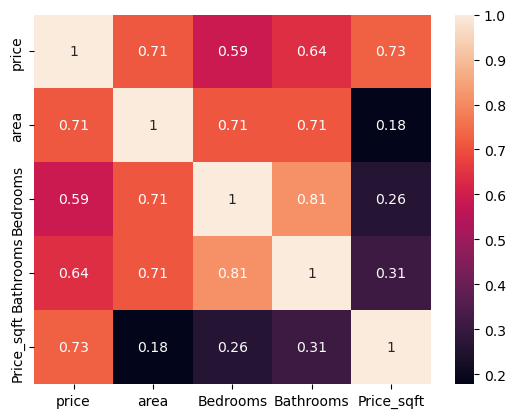

In [23]:
sns.heatmap(df1.corr(),annot=True)

## Dealing with Dimensionality Curse

In [24]:
# Unique values of Location
df1.Address.nunique()

3632

In [25]:
df1.Address.unique()

array(['Chembur, Mumbai - Harbour Line, Maharashtra',
       'Ghatkopar East, Mumbai - Central Line, Maharashtra',
       'Plot Number 283, Road Number 3, Jawahar Nagar, Off S. V. Road, Goregaon (West), Mumbai, Maharashtra, India 400104, Goregaon West, Mumbai - North Mumbai, Maharashtra',
       ...,
       'bldg no-137, axiom aven, near ganesh mandir, pant nagar, ghatkopar-east, mum-75, Ghatkopar East, Mumbai - Central Line, Maharashtra',
       '502., Hari Om Nagar, Mumbai - North Mumbai, Maharashtra',
       'Lokhandwala Complex, Andheri West, Lokhandwala Complex, Mumbai - Western Suburbs, Maharashtra'],
      dtype=object)

In [26]:
df1.Address=df1.Address.apply(lambda x:x.strip())

In [27]:
df1["LengthAddress"] = df1.Address.apply(lambda x: len(x.split(",")))

In [28]:
df1 = df1[df1["LengthAddress"]!=2]

In [29]:
df1.Address

0             Chembur, Mumbai - Harbour Line, Maharashtra
1             Chembur, Mumbai - Harbour Line, Maharashtra
2       Ghatkopar East, Mumbai - Central Line, Maharas...
3       Plot Number 283, Road Number 3, Jawahar Nagar,...
4       malad east, Malad East, Mumbai - North Mumbai,...
                              ...                        
6250     Yari Road, Mumbai - Western Suburbs, Maharashtra
6251    502., Hari Om Nagar, Mumbai - North Mumbai, Ma...
6252    Lokhandwala Complex, Andheri West, Lokhandwala...
6253           Sion, Mumbai - Central Mumbai, Maharashtra
6254      Mulund West, Mumbai - Central Line, Maharashtra
Name: Address, Length: 6248, dtype: object

In [30]:
df1["Address"] = df1.Address.apply(lambda x: x.split(",")[::-1][2].strip())

In [31]:
df1.Address.value_counts()

Mira Road                       302
Andheri West                    284
Mulund West                     194
Andheri East                    185
Kandivali West                  165
                               ... 
Babulnath                         1
Ghatkopar westGhatkopar West      1
Vallabh Baug Lane                 1
Banganga                          1
Hari Om Nagar                     1
Name: Address, Length: 638, dtype: int64

In [32]:
location_stats=df1.groupby('Address')['Address'].count().sort_values(ascending = False)
location_stats
# We display in ascending order and find there are many locations in the very end having only single entries. We need to combine.
# them under one location name and deal with sparse data and reduce complexity.

Address
Mira Road                                                  302
Andheri West                                               284
Mulund West                                                194
Andheri East                                               185
Kandivali West                                             165
                                                          ... 
Koldongri                                                    1
Kokani Pada                                                  1
Kokan Nagar                                                  1
Kirol Village                                                1
omkar Alta Monte Kurar Village Malad East Mumbai 400097      1
Name: Address, Length: 638, dtype: int64

In [33]:
location_stats_lessthan10=location_stats[location_stats<10]
location_stats_lessthan10
#3573 locations have less than 10 houses among 3632 entries in location. This is a huge amount and needs to be deal with to
# increase efficiency of our model.

Address
Mahalakshmi                                                9
Gorai 1                                                    9
Peddar Road                                                9
Amboli                                                     9
Lal Baug                                                   9
                                                          ..
Koldongri                                                  1
Kokani Pada                                                1
Kokan Nagar                                                1
Kirol Village                                              1
omkar Alta Monte Kurar Village Malad East Mumbai 400097    1
Name: Address, Length: 520, dtype: int64

In [34]:
#Unique entries after replacing the locations having less than 10 entries as Other Location
df1.Address=df1.Address.apply(lambda x:'Other location' if x in location_stats_lessthan10 else x )
df1.Address.nunique()

119

In [35]:
df1.drop("LengthAddress",axis=1,inplace=True)

In [36]:
df1.head(10)

,price,Address,area,Bedrooms,Bathrooms,neworold,type_of_building,Price_sqft
0,22400000.0,Chembur,629.0,2.0,2.0,New Property,Flat,35612.082671
1,35000000.0,Chembur,974.0,3.0,2.0,New Property,Flat,35934.291581
2,31700000.0,Ghatkopar East,968.0,3.0,3.0,New Property,Flat,32747.933884
3,18700000.0,Goregaon West,629.0,2.0,2.0,New Property,Flat,29729.729730
4,13500000.0,Malad East,1090.0,2.0,2.0,New Property,Flat,12385.321101
5,13000000.0,Bhandup,630.0,2.0,2.0,New Property,Flat,20634.920635
6,20700000.0,Goregaon West,1188.0,2.0,2.0,New Property,Flat,17424.242424
7,22900000.0,Other location,968.0,3.0,3.0,New Property,Flat,23657.024793
8,17000000.0,Wadala,820.0,2.0,2.0,New Property,Flat,20731.707317
9,81000000.0,Worli,3260.0,3.0,3.0,Resale,Flat,24846.625767


## Outliers reduction and removal
### Average room size in mumbai 200 sq. ft

In [37]:
# Checking what all entries have less than 200 sqft per bedroom. 200 is our base limit.
df1[df1.area/df1.Bedrooms < 200].head()

,price,Address,area,Bedrooms,Bathrooms,neworold,type_of_building,Price_sqft
957,10500000.0,Other location,660.0,6.0,2.0,Resale,Individual House,15909.090909
1186,12500000.0,Dahisar East,570.0,3.0,2.0,Resale,Flat,21929.824561
2638,15000000.0,Mulund West,516.0,3.0,3.0,Resale,Flat,29069.767442
2994,80000000.0,Other location,816.0,10.0,10.0,Resale,Flat,98039.215686
3084,9000000.0,Ulhasnagar,1200.0,8.0,8.0,Resale,Individual House,7500.000000


#### These are erroneous data - 
#### Eg 1. 660sqft home with 6 bedrooms, 570sqft with 3 bedrooms, very unusual data. So needs to be removed.
#### Eg 2. 516 sqft home with 3 bedrooms, 816 sqft with 10 bedrooms, very unusual data. So needs to be removed.

In [38]:
#Current Shape of our data frame.
df1.shape

(6248, 8)

In [39]:
#Creating a new dataframe df2 and removing all the unusual data points which give erroneous data for sqft per bedroom.
df2 = df1[(df1.area/df1.Bedrooms > 200)]
df2.shape
#Shape after removal of certain erroneous datapoints.

(6235, 8)

In [40]:
#Total number of unusual datapoints removed
len(df1)-len(df2)

13

In [41]:
df2.Price_sqft.describe()

count      6235.000000
mean      21422.112978
std       12659.044211
min        1500.000000
25%       13750.000000
50%       19285.714286
75%       26500.000000
max      119047.619048
Name: Price_sqft, dtype: float64

In [42]:
df2.head()

,price,Address,area,Bedrooms,Bathrooms,neworold,type_of_building,Price_sqft
0,22400000.0,Chembur,629.0,2.0,2.0,New Property,Flat,35612.082671
1,35000000.0,Chembur,974.0,3.0,2.0,New Property,Flat,35934.291581
2,31700000.0,Ghatkopar East,968.0,3.0,3.0,New Property,Flat,32747.933884
3,18700000.0,Goregaon West,629.0,2.0,2.0,New Property,Flat,29729.729730
4,13500000.0,Malad East,1090.0,2.0,2.0,New Property,Flat,12385.321101


In [43]:
df2.shape

(6235, 8)

In [44]:
df_describe=df2.groupby('Address').describe()
df_describe

price                                                      \
              count          mean           std         min         25%   
Address                                                                   
Agripada       15.0  4.613333e+07  2.108272e+07  17500000.0  34500000.0   
Ambernath      22.0  5.211364e+06  3.811291e+06   1650000.0   3587500.0   
Andheri East  185.0  2.314432e+07  9.895711e+06   5000000.0  17000000.0   
Andheri West  283.0  3.325283e+07  2.425500e+07   4450000.0  20000000.0   
Bandra East    26.0  4.810385e+07  3.233758e+07  11000000.0  26000000.0   
...             ...           ...           ...         ...         ...   
Wadala East    18.0  3.185556e+07  1.236486e+07  15800000.0  26125000.0   
Wadala West    12.0  3.141667e+07  1.370772e+07  17000000.0  20000000.0   
Walkeshwar     11.0  1.079545e+08  8.656138e+07  31500000.0  53500000.0   
Worli          70.0  7.024286e+07  4.844104e+07  12500000.0  41750000.0   
Yari Road      10.0  2.367000e+07  5.839530e+06  18000000.0  19500000.0   

                                                     area               \
                     50%          75%          max  count         mean   
Address                                                                  
Agripada      42500000.0   48750000.0  105000000.0   15.0  1290.533333   
Ambernath      4200000.0    5200000.0   21000000.0   22.0  1019.545455   
Andheri East  21000000.0   27000000.0   90000000.0  185.0  1082.313514   
Andheri West  25000000.0   35000000.0  160000000.0  283.0  1258.865724   
Bandra East   32250000.0   63750000.0  148800000.0   26.0  1498.500000   
...                  ...          ...          ...    ...          ...   
Wadala East   29100000.0   36875000.0   72900000.0   18.0  1340.888889   
Wadala West   28750000.0   38500000.0   62500000.0   12.0  1254.583333   
Walkeshwar    67500000.0  140750000.0  300000000.0   11.0  1480.909091   
Worli         63750000.0   75750000.0  340000000.0   70.0  1848.457143   
Yari Road     21600000.0   26375000.0   34000000.0   10.0   950.500000   

                                                            ... Bathrooms  \
                      std    min      25%     50%      75%  ...      mean   
Address                                                     ...             
Agripada       434.710062  800.0   929.00  1300.0  1425.00  ...  2.600000   
Ambernath      383.634713  580.0   840.00   933.0  1030.00  ...  2.090909   
Andheri East   388.715665  540.0   847.00  1000.0  1200.00  ...  2.286486   
Andheri West   695.591903  510.0   887.00  1079.0  1382.50  ...  2.484099   
Bandra East    706.746532  580.0  1065.00  1275.0  1837.50  ...  3.000000   
...                   ...    ...      ...     ...      ...  ...       ...   
Wadala East    443.573708  750.0  1126.75  1271.5  1357.50  ...  2.777778   
Wadala West    468.893564  700.0   928.75  1185.0  1482.50  ...  2.416667   
Walkeshwar     990.257083  550.0   825.00  1000.0  2100.00  ...  2.909091   
Worli         1127.036716  510.0  1144.25  1519.5  2346.75  ...  3.228571   
Yari Road      160.804402  725.0   842.50   915.0  1037.50  ...  2.100000   

                                                Price_sqft                \
                   std  min  25%  50%  75%  max      count          mean   
Address                                                                    
Agripada      0.736788  2.0  2.0  2.0  3.0  4.0       15.0  35628.942263   
Ambernath     0.294245  2.0  2.0  2.0  2.0  3.0       22.0   4851.561546   
Andheri East  0.570165  2.0  2.0  2.0  2.0  5.0      185.0  21676.026888   
Andheri West  0.809252  2.0  2.0  2.0  3.0  6.0      283.0  25854.649809   
Bandra East   1.095445  2.0  2.0  3.0  4.0  5.0       26.0  30552.761284   
...                ...  ...  ...  ...  ...  ...        ...           ...   
Wadala East   0.732084  2.0  2.0  3.0  3.0  4.0       18.0  23752.982983   
Wadala West   0.668558  2.0  2.0  2.0  3.0  4.0       12.0  25120.825574   
Walkeshwar 

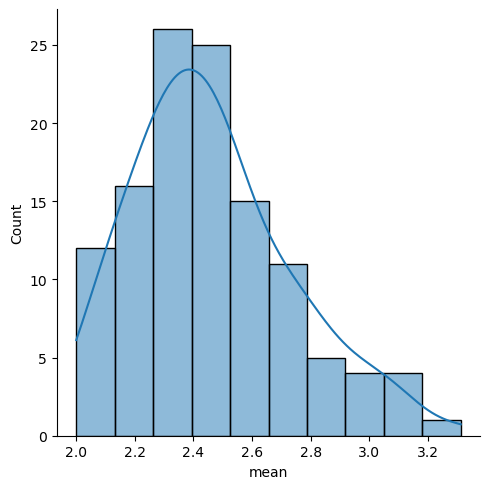

In [45]:
# Distribution of mean value of Bedrooms grouped by location.
sns.displot(df_describe['Bedrooms']['mean'],bins = 10,kde=True)

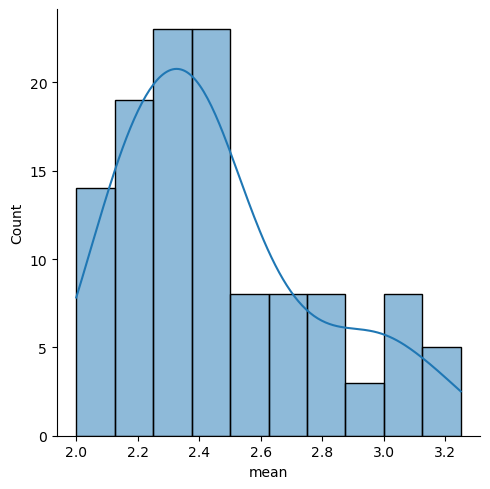

In [46]:
# Distribution of mean value of Bathrooms grouped by location.
sns.displot(df_describe['Bathrooms']['mean'],bins = 10,kde=True)

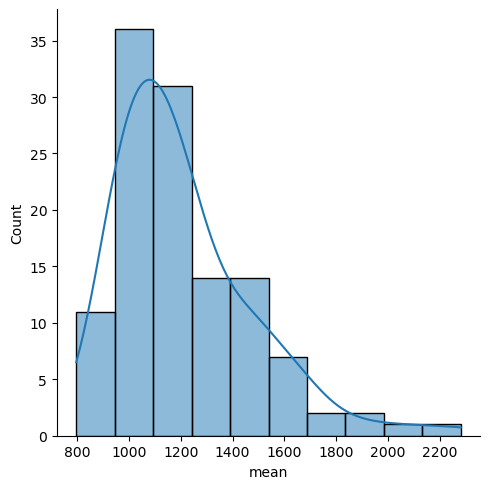

In [47]:
# Distribution of mean value of area grouped by location.
sns.displot(df_describe['area']['mean'],bins = 10,kde=True)

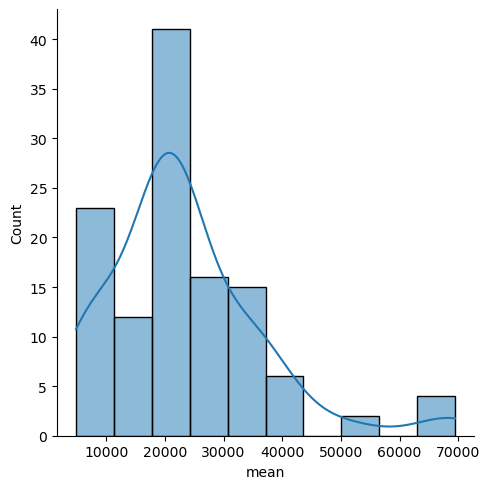

In [48]:
# Distribution of mean value of price per sqft grouped by location.
sns.displot(df_describe['Price_sqft']['mean'],bins = 10,kde=True)

In [49]:
def remove_outliers_iqr(ds):
    df_out = pd.DataFrame()
    for key,subdf in ds.groupby('Address'):
        Q1 = subdf["Price_sqft"].quantile(0.25)
        Q3 = subdf["Price_sqft"].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        reduced_df = subdf[(subdf.Price_sqft>=lower_bound) & (subdf.Price_sqft<=upper_bound)]
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
    return df_out
df3 =remove_outliers_iqr(df2)
df3.shape #Displaying the Shape

(5949, 8)

In [109]:
df2.shape[0]-df3.shape[0]

286

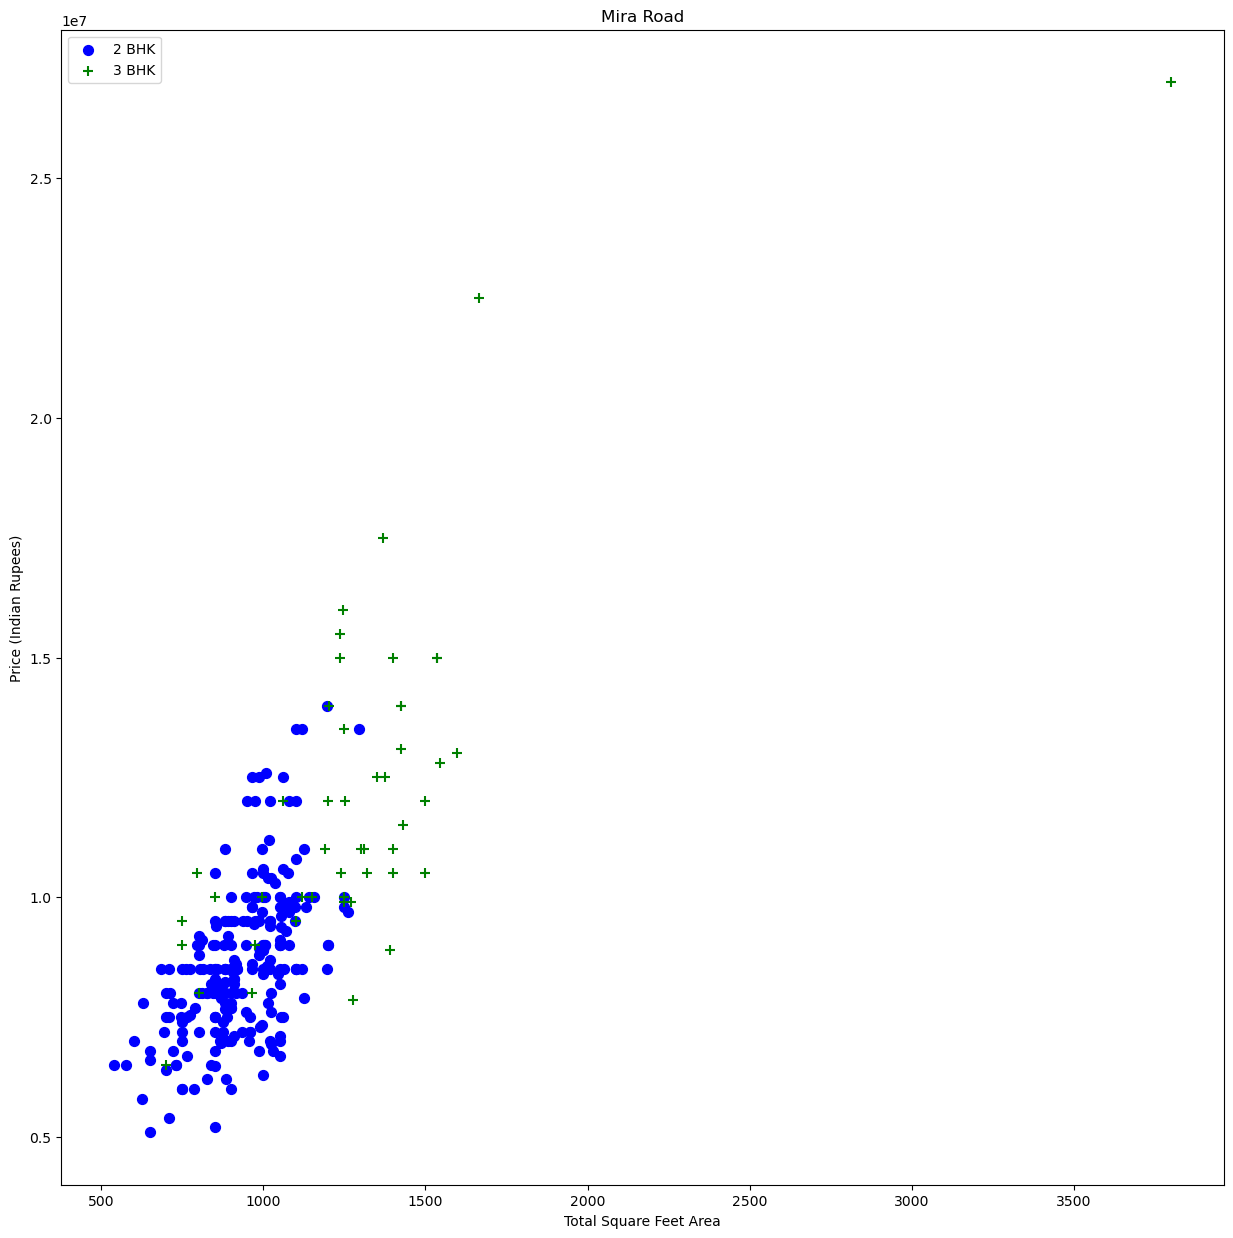

In [103]:
#Certain Data Points have same sqft 3BHK flats priced less than 2BHK flats. These are outliers and have to be removed.
def plot_scatter_chart(df,location):
    bhk2 = df[(df.Address==location) & (df.Bedrooms==2)]  #Finding 2BHK flats
    bhk3 = df[(df.Address==location) & (df.Bedrooms==3)]  #Finding 3BHK flats
    plt.figure(figsize=(15,15))
    plt.scatter(bhk2.area,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.area,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df3,"Mira Road")

In [52]:
#plot_scatter_chart(df3,"Andheri West")

In [110]:
#2BHK flat should have price lesser than 3BHK of same sqft.
#Filtering out all those values of say 2BHK whose price is less than 3BHK. 
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Address'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('Bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_sqft),
                'std': np.std(bhk_df.Price_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('Bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df4 = remove_bhk_outliers(df3)
df4.shape

(5106, 8)

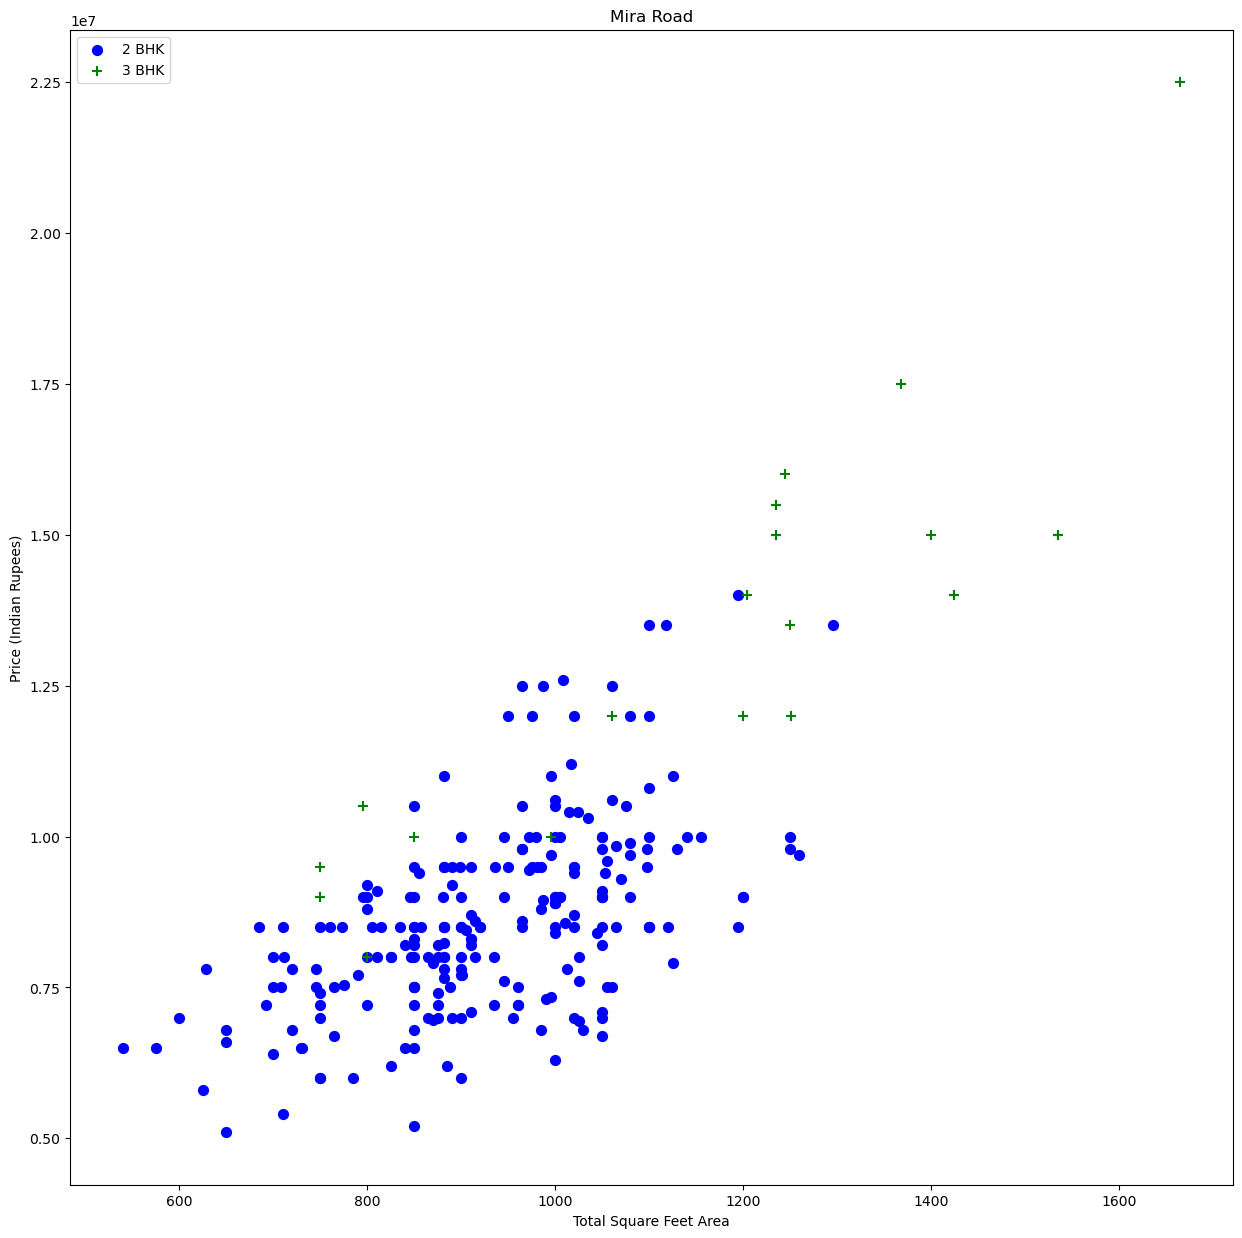

In [107]:
plot_scatter_chart(df4,"Mira Road")

In [ ]:
#plot_scatter_chart(df4,"Andheri West")

In [112]:
#Total number of anomalies removes
df3.shape[0] - df4.shape[0]

843

### Removing bathroom specific outliers.

In [113]:
df4.Bathrooms.unique()

array([2., 4., 3., 5., 6., 0., 7., 8.])

Text(0, 0.5, 'Count')

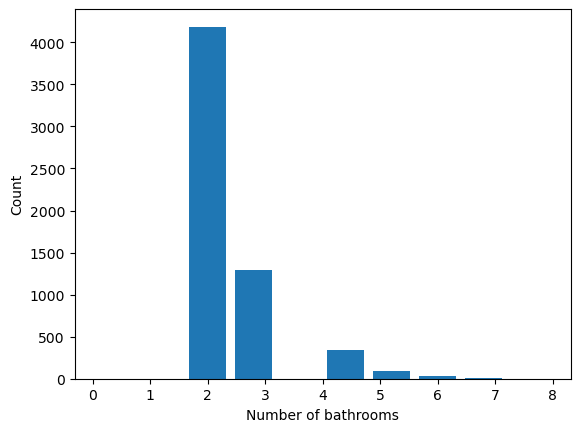

In [55]:
plt.hist(df4.Bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [114]:
#Any time we have bathrooms greater than bedroom remove those outliers.
df4[df4.Bathrooms>df4.Bedrooms]

ValueError: Can only compare identically-labeled Series objects

In [115]:
df5=df4[df4.Bathrooms<=df4.Bedrooms]
df5.shape

(4823, 8)

In [116]:
df5.head()

,price,Address,area,Bedrooms,Bathrooms,neworold,type_of_building,Price_sqft
0,47500000.0,Agripada,1400.0,2.0,2.0,Resale,Flat,33928.571429
1,76500000.0,Agripada,2000.0,4.0,4.0,New Property,Flat,38250.000000
2,42500000.0,Agripada,900.0,2.0,2.0,Resale,Individual House,47222.222222
3,55000000.0,Agripada,1200.0,3.0,3.0,Resale,Flat,45833.333333
5,40000000.0,Agripada,958.0,2.0,2.0,Resale,Flat,41753.653445


In [117]:
df5.var()

C:\Users\bijoy\AppData\Local\Temp\ipykernel_31404\2320642631.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df5.var()


price         4.506497e+14
area          2.563263e+05
Bedrooms      4.342590e-01
Bathrooms     3.031753e-01
Price_sqft    1.177932e+08
dtype: float64

In [132]:
#converting othe categorical column into numerical using label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df5["neworold"]=le.fit_transform(df5["neworold"])
df5["type_of_building"]=le.fit_transform(df5["type_of_building"])
df5.head()

C:\Users\bijoy\AppData\Local\Temp\ipykernel_31404\1536041769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["neworold"]=le.fit_transform(df5["neworold"])
C:\Users\bijoy\AppData\Local\Temp\ipykernel_31404\1536041769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["type_of_building"]=le.fit_transform(df5["type_of_building"])


,price,Address,area,Bedrooms,Bathrooms,neworold,type_of_building,Price_sqft
0,47500000.0,Agripada,1400.0,2.0,2.0,1,0,33928.571429
1,76500000.0,Agripada,2000.0,4.0,4.0,0,0,38250.000000
2,42500000.0,Agripada,900.0,2.0,2.0,1,1,47222.222222
3,55000000.0,Agripada,1200.0,3.0,3.0,1,0,45833.333333
5,40000000.0,Agripada,958.0,2.0,2.0,1,0,41753.653445


In [133]:
df5.head()

,price,Address,area,Bedrooms,Bathrooms,neworold,type_of_building,Price_sqft
0,47500000.0,Agripada,1400.0,2.0,2.0,1,0,33928.571429
1,76500000.0,Agripada,2000.0,4.0,4.0,0,0,38250.000000
2,42500000.0,Agripada,900.0,2.0,2.0,1,1,47222.222222
3,55000000.0,Agripada,1200.0,3.0,3.0,1,0,45833.333333
5,40000000.0,Agripada,958.0,2.0,2.0,1,0,41753.653445


### Converting Address column from a categorical to numerical data

In [134]:
df5.Address.unique()

array(['Agripada', 'Ambernath', 'Andheri East', 'Andheri West',
       'Bandra East', 'Bandra Kurla Complex', 'Bandra West',
       'Bhakti Park', 'Bhandup', 'Bhandup West', 'Bhayandar East',
       'Bhayandar West', 'Borivali East', 'Borivali West', 'Byculla',
       'Chandivali', 'Charkop', 'Chembur', 'Chembur East', 'Cuffe Parade',
       'D.N. Nagar', 'Dadar East', 'Dadar West', 'Dahanukar Wadi',
       'Dahisar East', 'Dahisar West', 'Deonar', 'Film City Road',
       'Ghatkopar', 'Ghatkopar East', 'Ghatkopar West', 'Gokuldham',
       'Gorai 2', 'Goregaon East', 'Goregaon West', 'Grant Road',
       'JVLR-Jogeshwari Vikhroli Link Road', 'JVPD Scheme',
       'Jankalyan Nagar', 'Jogeshwari East', 'Jogeshwari West', 'Juhu',
       'Kalina', 'Kalyan', 'Kandivali East', 'Kandivali West',
       'Kanjurmarg East', 'Kanjurmarg West', 'Khar West', 'Kurla East',
       'Kurla West', 'Link Road', 'Lokhandwala Complex',
       'Lokhandwala Twp', 'Lower Parel', 'Mahavir Nagar', 'Mahim',
   

In [135]:
#Location is a categorical column, need to convert it to a numerical using one hot encoding ---> dummies.
dummies = pd.get_dummies(df5.Address)
dummies.head(5)

,Agripada,Ambernath,Andheri East,Andheri West,Bandra East,Bandra Kurla Complex,Bandra West,Bhakti Park,Bhandup,Bhandup West,Bhayandar East,Bhayandar West,Borivali East,Borivali West,Byculla,...,Versova,Vikhroli East,Vikhroli West,Vile Parle East,Vile Parle West,Vinay Nagar,Virar,Virar East,Virar West,Wadala,Wadala East,Wadala West,Walkeshwar,Worli,Yari Road
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
# Getting rid of the dummy variabe trap. Dropping the categorical column for 'Other Location' type.
df6 = pd.concat([df5,dummies.drop('Other location',axis ='columns')],axis ='columns')
df6.head(3)

,price,Address,area,Bedrooms,Bathrooms,neworold,type_of_building,Price_sqft,Agripada,Ambernath,Andheri East,Andheri West,Bandra East,Bandra Kurla Complex,Bandra West,...,Versova,Vikhroli East,Vikhroli West,Vile Parle East,Vile Parle West,Vinay Nagar,Virar,Virar East,Virar West,Wadala,Wadala East,Wadala West,Walkeshwar,Worli,Yari Road
0,47500000.0,Agripada,1400.0,2.0,2.0,1,0,33928.571429,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,76500000.0,Agripada,2000.0,4.0,4.0,0,0,38250.000000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,42500000.0,Agripada,900.0,2.0,2.0,1,1,47222.222222,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
df6.columns

Index(['price', 'Address', 'area', 'Bedrooms', 'Bathrooms', 'neworold',
       'type_of_building', 'Price_sqft', 'Agripada', 'Ambernath',
       ...
       'Vinay Nagar', 'Virar', 'Virar East', 'Virar West', 'Wadala',
       'Wadala East', 'Wadala West', 'Walkeshwar', 'Worli', 'Yari Road'],
      dtype='object', length=126)

In [138]:
# X is our independent variables. Price is what we want to predict based on total_sqft, bathrooms and bedrooms.
X=df6.drop(["price","Address","Price_sqft"],axis=1)

In [139]:
X.head(3)

,area,Bedrooms,Bathrooms,neworold,type_of_building,Agripada,Ambernath,Andheri East,Andheri West,Bandra East,Bandra Kurla Complex,Bandra West,Bhakti Park,Bhandup,Bhandup West,...,Versova,Vikhroli East,Vikhroli West,Vile Parle East,Vile Parle West,Vinay Nagar,Virar,Virar East,Virar West,Wadala,Wadala East,Wadala West,Walkeshwar,Worli,Yari Road
0,1400.0,2.0,2.0,1,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2000.0,4.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,900.0,2.0,2.0,1,1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [140]:
#Checking shape of x.
X.shape

(4823, 123)

In [141]:
# y is our dependent variables. Dependent on location, total_sqft, BHK and bath.
y = df6[['price']]
y.head(3)

,price
0,47500000.0
1,76500000.0
2,42500000.0


In [142]:
# Checking length of y.
len(y)

4823

# Training and testing model

In [143]:
# Splitting our dataset in training and testing dataset using sklearn's train_test_split method.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=20)

In [144]:
# Importing sklearn's Linear Regression model and fitting and training the model. Testing the same model and displaying the score.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Predicting test data

In [145]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[ 2.32547602e+04  5.92778490e+05  6.44947188e+06 -6.21469122e+04
  -1.72843845e+03  1.89377239e+07 -1.53108690e+07  4.50873757e+05
   5.14036125e+06  4.19836031e+06  1.30791034e+07  3.29150150e+07
  -2.99938583e+06 -6.02372228e+06 -5.17116779e+06 -1.08971570e+07
  -1.23560194e+07 -1.65633591e+06 -1.08668184e+06  1.10735965e+07
  -3.14008179e+06 -7.31774833e+06  1.73867078e+06  4.29350876e+05
   4.82365676e+07  2.07432877e+06  1.56560300e+07  1.30792649e+07
  -1.82966007e+06 -3.97549809e+06 -2.98936328e+06  2.10712690e+06
  -7.25764298e+06 -1.02993109e+06  4.93802628e+06 -8.64340844e+05
  -1.19060432e+06 -1.00044101e+07 -5.87086650e+06 -6.50306276e+05
   1.08523985e+07 -6.23070194e+06  2.68425055e+07 -3.62363903e+06
  -1.93304229e+06  4.71605649e+05  3.33689029e+07  1.96612663e+06
  -1.38058558e+07 -3.79454640e+06 -3.01226688e+06 -1.62167364e+06
  -1.08592947e+06  2.21185760e+07 -4.54113493e+06 -4.54803338e+06
  -1.96195452e+06  6.26758223e+06 -7.21520897e+06  4.1760897

In [146]:
predictions=lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

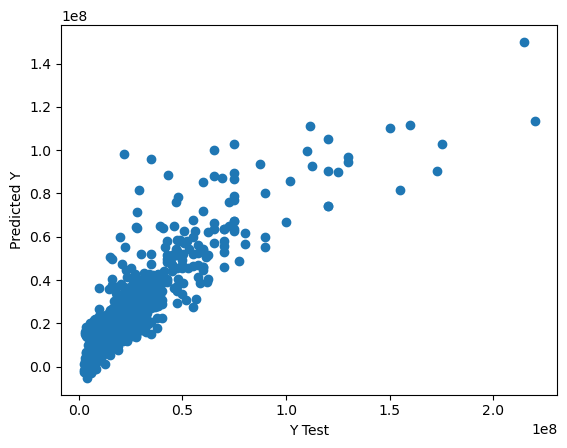

In [98]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

In [147]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5533302.274692375
MSE: 79203655262174.81
RMSE: 8899643.54691663


In [148]:
from sklearn.metrics import r2_score 
r2=r2_score(y_test,predictions)
print(r2)

0.8309236601950932


In [149]:
#display adjusted R-squared
adjusted_r2=1 - ((1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1))
print(adjusted_r2)

0.8264979547692572


C:\Users\bijoy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


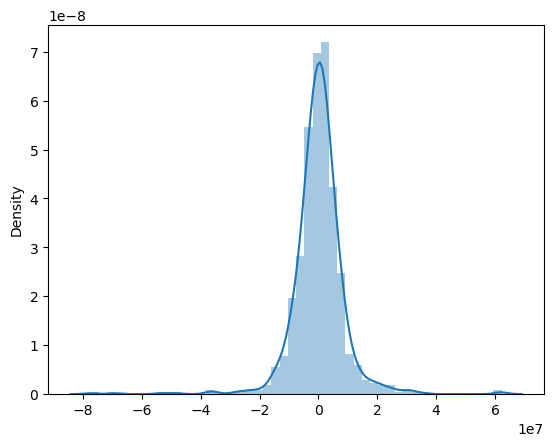

In [150]:
sns.distplot((y_test-predictions),bins=50);

In [88]:
X_train

,area,Bedrooms,Bathrooms,neworold,type_of_building,Price_sqft,Agripada,Ambernath,Andheri East,Andheri West,Bandra East,Bandra Kurla Complex,Bandra West,Bhakti Park,Bhandup,...,Versova,Vikhroli East,Vikhroli West,Vile Parle East,Vile Parle West,Vinay Nagar,Virar,Virar East,Virar West,Wadala,Wadala East,Wadala West,Walkeshwar,Worli,Yari Road
5814,858.0,2.0,2.0,1,0,18648.018648,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4947,1500.0,3.0,3.0,1,0,21333.333333,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1454,1000.0,2.0,2.0,1,0,17500.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1835,820.0,2.0,2.0,1,0,22560.975610,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1061,1000.0,3.0,3.0,0,0,20000.000000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1703,740.0,2.0,2.0,0,0,30405.405405,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4163,1042.0,2.0,2.0,1,0,6525.911708,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1515,1143.0,2.0,2.0,1,0,20559.930009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4633,1040.0,2.0,2.0,1,1,12980.769231,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Define a price prediction function.

In [151]:
# Predict price function that predicts flat price based on Address, sqft, bathrooms and bedrooms using our model's prediction.
def predict_price(Address,area,Bathrooms,Bedrooms):    
    loc_index = np.where(X.columns==Address)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = Bedrooms
    x[2] = Bathrooms
    if loc_index >= 0:
        x[loc_index] = 1
    
    return lm.predict([x])[0][0]

# Predicting some flat values - based on location, sqft, BHK and Bathrooms. 

In [152]:
print(predict_price('Chembur',629, 2, 2),'Rs')

13598972.876733623 Rs


C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [153]:
print(round(predict_price('Andheri East',900, 2, 2),0),'Rs')

18613216.0 Rs


C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [154]:
print(round(predict_price('Andheri West',1000, 2, 2),0),'Rs')

25628179.0 Rs


C:\Users\bijoy\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
